In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator
import nibabel as nib
import pickle

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from funcs.imgproc import get_imgs_designmx, rms_all, feature_df, show_stim, get_rms_contrast, get_rms_contrast_lab, get_contrast_df, get_img_prf, get_visfeature_dict
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict
from funcs.utility import print_dict_structure, print_large, get_zscore, hypotheses_plot, multiple_regression
from funcs.analyses import multivariate_regression, regression_dict_multivariate, plot_roi_beta_distribution, get_hrf_dict
from funcs.utility import numpy2coords, coords2numpy, filter_array_by_size, find_common_rows
# from funcs.viscontrasts import lgn_statistics
from notebooks.alien_nbs.lgnpy.lgnpy.CEandSC import lgn_statistics

In [3]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

Load in the visual contrast features (currently only rms)

In [4]:
with open('./data/custom_files/all_visfeats_rms.pkl', 'rb') as fp:
   visfeats_rms = pickle.load(fp)

Load in the pRF based voxel selection masks

In [5]:

# Load in the saved masks for selected voxels that have their prf inside the inner patch.
with open('./data/custom_files/subj01/prf_mask_center_strict.pkl', 'rb') as fp:
    prf_mask_center_strict = pickle.load(fp)
    
    
with open('./data/custom_files/subj01/prf_mask_central_loose.pkl', 'rb') as fp:
    prf_mask_central_loose = pickle.load(fp) 
    

# Load in the saved file
with open('./data/custom_files/subj01/prf_mask_periphery_strict.pkl', 'rb') as fp:
   prf_mask_periphery_strict = pickle.load(fp)


# Load in the saved file
with open('./data/custom_files/subj01/new_prf_mask_central_strict.pkl', 'rb') as fp:
   new_central_mask = pickle.load(fp)

Load in the HRF signal dictionaries for different voxel selections

beta_dict0_5_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 4500
beta_dict6_15_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 12000
beta_dict16_25_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 19500
beta_dict26_35_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 27000
beta_dict36_39_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 30000


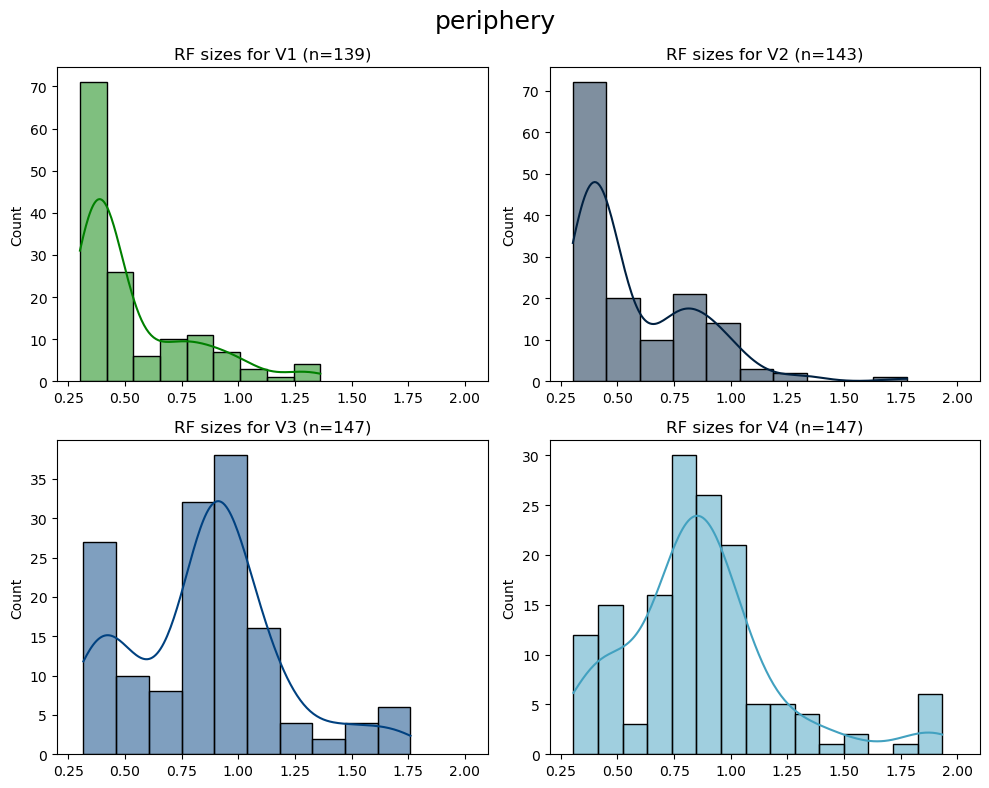

In [6]:
# Create the hrf_dict for the periphery with sizes .2 to 1
# The plot shows the ROI-specific distribution of RF sizes
hrf_dict_peri, voxmask_tight_peri, joint_voxs, sizes = get_hrf_dict('subj01', prf_mask_periphery_strict, prf_region = 'periphery', 
                                                                    min_size = .3, max_size = 2, prf_proc_dict = prf_dict, 
                                                                    vox_n_cutoff = 160, plot_sizes = 'y')

beta_dict0_5_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 4500
beta_dict6_15_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 12000
beta_dict16_25_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 19500
beta_dict26_35_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 27000
beta_dict36_39_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 30000


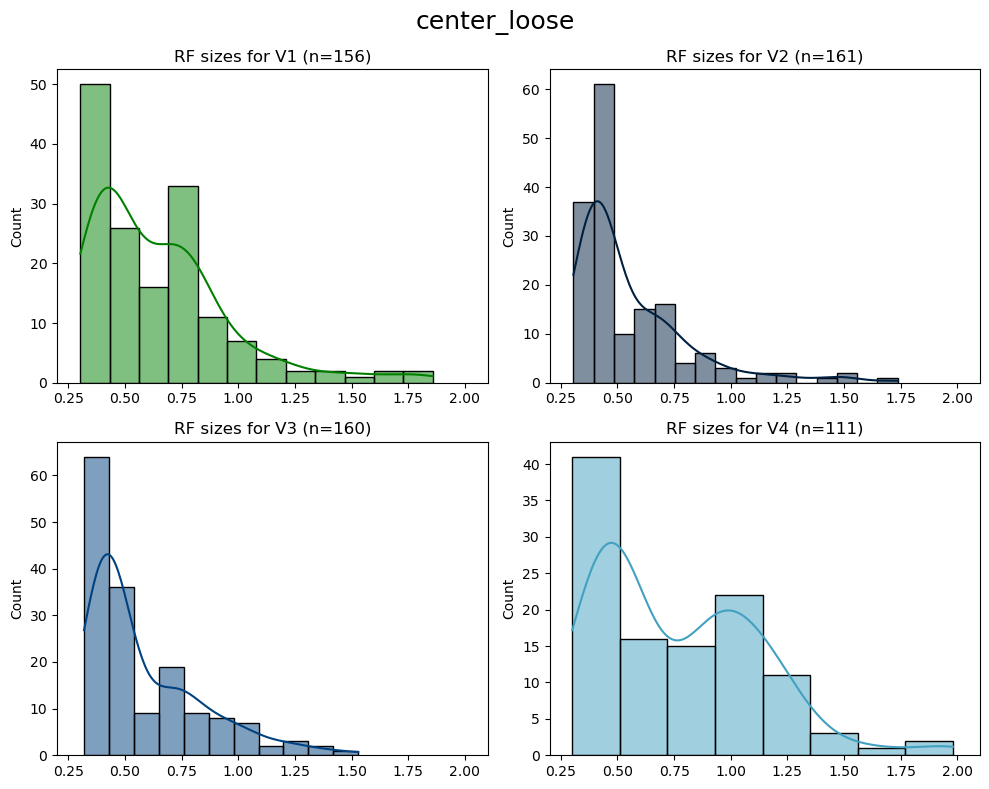

In [7]:
# Create the hrf_dict for the periphery with sizes .2 to 1

hrf_dict_central_loose, voxmask_tight_central_loose, joint_voxs, sizes = get_hrf_dict('subj01', prf_mask_central_loose, prf_region = 'center_loose', 
                                                                    min_size = .3, max_size = 2, prf_proc_dict = prf_dict, 
                                                                    vox_n_cutoff = None, plot_sizes = 'y')

beta_dict0_2.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 2250
beta_dict3_5.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 4500
beta_dict6_10.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 8250
beta_dict11_15.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 12000
beta_dict16_20.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 15750
beta_dict21_27.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 21000
beta_dict28_35.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 27000
beta_dict36_39.pkl
	Amount of voxels: 98
	Amount of voxels: 171

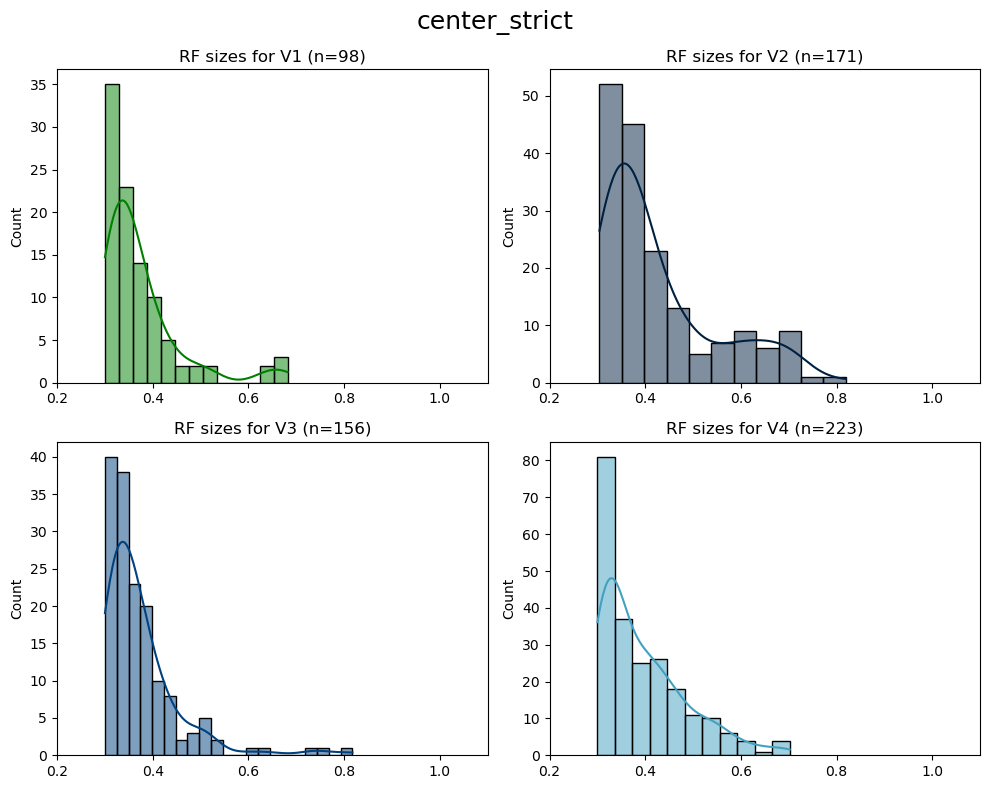

In [8]:
# 1 min
# hrf_dict = get_hrf_dict('subj01', voxels = prf_selection_mask)
hrf_dict_tight, voxmask_tight, joint_voxs, sizes  = get_hrf_dict('subj01', voxels = prf_mask_center_strict, prf_region = 'center_strict', 
                                             min_size = .3, max_size = 1, prf_proc_dict = prf_dict, plot_sizes = 'y')






In [212]:
def regression_dict_multivariate(subject, feat_type, voxels, hrfs, feat_vals, n_imgs='all', z_scorey:bool = False):
    reg_dict = {}
    
    # Set the amount of images to regress over in case all images are available.
    if n_imgs == 'all':
        n_imgs = len(feat_vals)
    
    X = np.array(feat_vals[feat_type][:n_imgs]).reshape(n_imgs, 1)  # Set the input matrix for the regression analysis
    

    
    # This function will run the multiple regression analysis for each voxel, roi, image, for a subject.
    rois = list(voxels[subject].keys())

    for roi in rois:
        reg_dict[roi] = {}
        voxel_mask = voxels[subject][roi]  # These are the boolean mask for the specific subject, roi
        n_voxels = np.sum(voxel_mask).astype('int')  # This is the number of voxels in this roi
        vox_indices = np.column_stack(np.where(voxel_mask == 1))  # Get voxel indices for the current ROI
        
        # Extract y_matrix for all voxels within the ROI
            
        if z_scorey:
            y_matrix = get_zscore(y_matrix, print_ars = 'n')
            
        y_matrix = np.array([hrfs[subject][roi][f'voxel{voxel + 1}']['hrf_betas'] for voxel, xyz in enumerate(vox_indices)]).T #/ 300


        # Perform multivariate regression
        beta_values, intercept_values, rsquared_value, reg_model = multivariate_regression(X, y_matrix, z_scorey = z_scorey)
        
        
        reg_dict[roi]['voxels'] = {}
        
        for voxel, vox_idx in enumerate(vox_indices):
            reg_dict[roi]['voxels'][f'vox{voxel}'] = {
                'xyz': list(vox_idx),
                'beta': beta_values[voxel],
                'icept': intercept_values[voxel]
            }
            
        reg_dict[roi]['y_matrix'] = y_matrix
        reg_dict[roi]['all_reg_betas'] = beta_values
        reg_dict[roi]['all_intercepts'] = intercept_values
        reg_dict[roi]['rsquared'] = rsquared_value
        


    return reg_dict, X

In [213]:
regdict_prfc_rmsrel, X_multivariate1 = regression_dict_multivariate('subj01', 'rms_z',voxmask_tight, hrf_dict_tight, 
                                                                                            visfeats_rms['subj01']['rms'], n_imgs=30000, z_scorey = False)

regdict_prfc_rmsirrel, X_multivariate2 = regression_dict_multivariate('subj01', 'rms_z', voxmask_tight, hrf_dict_tight, 
                                                                                            visfeats_rms['subj01']['rms_irrelevant'], n_imgs=30000, z_scorey = False)



In [211]:
from sklearn.linear_model import LinearRegression

def multivariate_regression(X, y_matrix, z_scorey:bool = False):
    # Reshape X to (n_imgs, 1) if it's not already
    if X.ndim == 1:
        X = X.reshape(-1, 1)


    if z_scorey:
        y_matrix = get_zscore(y_matrix, print_ars = 'n')

    # Fit the multivariate regression model
    model = LinearRegression().fit(X, y_matrix)

    # Extract beta coefficients and intercepts
    beta_values = model.coef_
    intercept_values = model.intercept_

    # Calculate R-squared values
    rsquared_values = model.score(X, y_matrix)

    return beta_values, intercept_values, rsquared_values, model

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  2.,
         0.,  3.,  2.,  0.,  1.,  5., 10., 12., 20., 30., 29., 22.,  8.,
        12., 13.,  5.,  5.,  2.,  3.,  6.,  2.,  3.,  5.,  3.,  1.,  4.,
         0.,  2.,  0.,  3.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.06913, -0.06636, -0.06359, -0.06081, -0.05804, -0.05527,
        -0.0525 , -0.04973, -0.04695, -0.04418, -0.04141, -0.03864,
        -0.03586, -0.03309, -0.03032, -0.02755, -0.02478, -0.022  ,
        -0.01923, -0.01646, -0.01369, -0.01091, -0.00814, -0.00537,
        -0.0026 ,  0.00018,  0.00295,  0.00572,  0.00849,  0.01126,
         0.01404,  0.01681,  0.01958,  0.02235,  0.02513,  0.0279 ,
         0.03067,  0.03344,  0.03621,  0.03899,  0.04176,  0.04453,
         0.0473 ,  0.05008,  0.05285,  0.05562,  0.05839,  0.06117,
         0.06394,  0.06671,  0.06948]),
 <BarContainer object of 50 artists>)

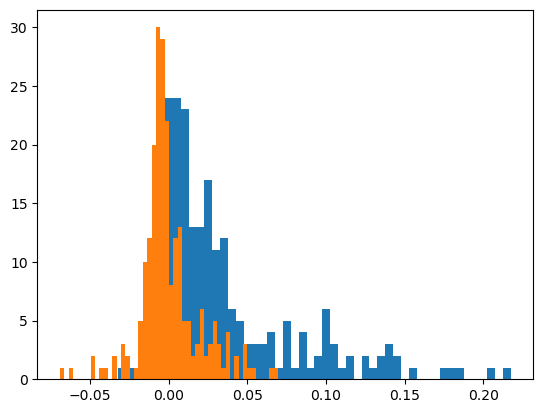

In [214]:
b1, i1, r1, results1 = multivariate_regression(X_multivariate1, regdict_prfc_rmsirrel['V4_mask']['y_matrix'])

b2, i2, r2, results2 = multivariate_regression(X_multivariate2, regdict_prfc_rmsirrel['V4_mask']['y_matrix'])

plt.hist(b1, bins = 50)
plt.hist(b2, bins = 50)




0.00011587800627857383


In [97]:
print(y_matrix_multivariate1.shape)
# print(y_matrix_multivariate2)

# print(X_multivariate1)
# print(X_multivariate2)




print(regdict_prfc_rmsrel['V1_mask']['voxels']['vox0'])
print(regdict_prfc_rmsirrel['V1_mask']['voxels']['vox0'])

print(regdict_prfc_rmsrel['V1_mask']['all_reg_betas'])
print(regdict_prfc_rmsirrel['V1_mask']['all_reg_betas'])

(30000, 223)
{'xyz': [56, 9, 74], 'beta': array([-0.0277]), 'R2': 0.0007387931623847876, 'icept': 0.03032391617098908}
{'xyz': [56, 9, 74], 'beta': array([-0.0277]), 'R2': 0.0004203049410487214, 'icept': 0.02287210317742253}
[[-0.0277   0.10872  0.03717  0.17256  0.11462  0.01998  0.29253  0.28207
   0.19142  0.33537  0.09418  0.04898  0.41964 -0.08257  0.21637  0.20712
   0.29964  1.65488 -0.09105  1.65942  0.52281  0.6895   0.69454  0.93467
   0.53198  0.43574  0.45302  1.15835  0.83163  0.69832  0.46902  0.29481
   0.13287  0.10389  1.28195  0.97744  0.53073 -0.06562  0.52715  0.09163
   0.05606  1.09209  0.9991   0.69045  2.10625  1.93502  0.55019  0.25447
   0.15522  1.80614  2.09128  2.10923  1.61341  0.85497  0.55693  0.45674
   0.32016  0.20557  1.61756  1.64845  1.57774  1.30419  0.99962  0.85892
   0.74457  0.51176  0.45882  0.48079  0.39014  0.2656   3.4856   1.76987
   1.26961  1.05292  1.03454  1.01189  0.94723  0.80987  0.57045  0.45461
   0.48564  0.44937  0.33094  0.211

In [90]:
print(visfeats_rms['subj01']['rms_irrelevant'])


print(visfeats_rms['subj01']['rms'])

       img_no        rms     rms_z
0       46002  43.184334  2.283840
1       61882   3.326942 -1.176696
2         828   1.465250 -1.338334
3       67573  10.215945 -0.578573
4       16020  19.639215  0.239583
...       ...        ...       ...
29995   13773   6.043644 -0.940824
29996   66767   9.481102 -0.642374
29997   53167  25.616161  0.758519
29998    1943  21.087907  0.365363
29999    5033  11.264713 -0.487516

[30000 rows x 3 columns]
       img_no        rms     rms_z
0       46002  25.471033 -0.060673
1       61882  22.462335 -0.306086
2         828  18.877597 -0.598484
3       67573  42.634550  1.339314
4       16020  16.612092 -0.783276
...       ...        ...       ...
29995   13773  22.456342 -0.306574
29996   66767   8.632073 -1.434187
29997   53167  27.830569  0.131789
29998    1943  20.272697 -0.484689
29999    5033   8.638144 -1.433692

[30000 rows x 3 columns]


In [72]:
for i, (roi, voxels) in enumerate(regdict_prfc_rmsirrel.items()):
    print(voxels['vox0'])

{'xyz': [56, 9, 74], 'beta': array([-0.0277]), 'R2': 0.0004203049410487214, 'icept': 0.02287210317742253}
{'xyz': [52, 8, 70], 'beta': array([4.02138]), 'R2': 9.338535769431999e-05, 'icept': 0.0391011840919629}
{'xyz': [45, 12, 71], 'beta': array([0.10374]), 'R2': 4.87125193776583e-05, 'icept': -0.009805588346597444}
{'xyz': [39, 19, 61], 'beta': array([0.4278]), 'R2': 2.9602459000743764e-06, 'icept': 0.0036840731779065224}


In [204]:
import seaborn as sns
def plot_roi_beta_distribution(reg_dict, z_score = None, icept_correct = None, feat_type = ''):
    
    
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    colors = sns.color_palette('ocean', n_colors=len(reg_dict))
    num_bins = 30  # Specify the number of bins
    icept_values = []
    for i, (roi, voxels) in enumerate(reg_dict.items()):
        
        beta_values = np.concatenate([voxel_data['beta'] for voxel_data in voxels['voxels'].values()])
        plot_vals = beta_values
        icept_values = np.concatenate([np.array([voxel_data['icept']]) for voxel_data in voxels['voxels'].values()])        

        if icept_correct == 'y':
            plot_vals = beta_values / get_zscore(icept_values, print_ars = 'n')

        sns.histplot(plot_vals, kde=True, ax=axes[i], color=colors[i], label=f'{roi} ROI', bins=num_bins)  # Specify the bins

        axes[i].set_title(f'Distribution of Beta Values for {roi[:2]}\n'
                        f'n_voxels={len(beta_values)}')
        axes[i].set_ylabel('Occurrence freq', weight = 'normal', fontsize = 12)
        axes[i].set_xlim(-.05, .15)  # Set the same x range for all subplots

        # axes[i].set_xticks(np.arange(-1, 15, .5))  # Set the ticks to be more frequent
        axes[i].set_xticks(np.arange(-.05, .15, .05))  # Set the ticks to be more frequent

    axes[-1].set_xlabel('Beta values', weight = 'normal', fontsize = 12)
    fig.suptitle(f'Multivariate regression approach (Subject 1, all images, HRF beta) {feat_type}', fontsize=16, y=1)

    plt.tight_layout()
    plt.show()
    


0
1
2
3


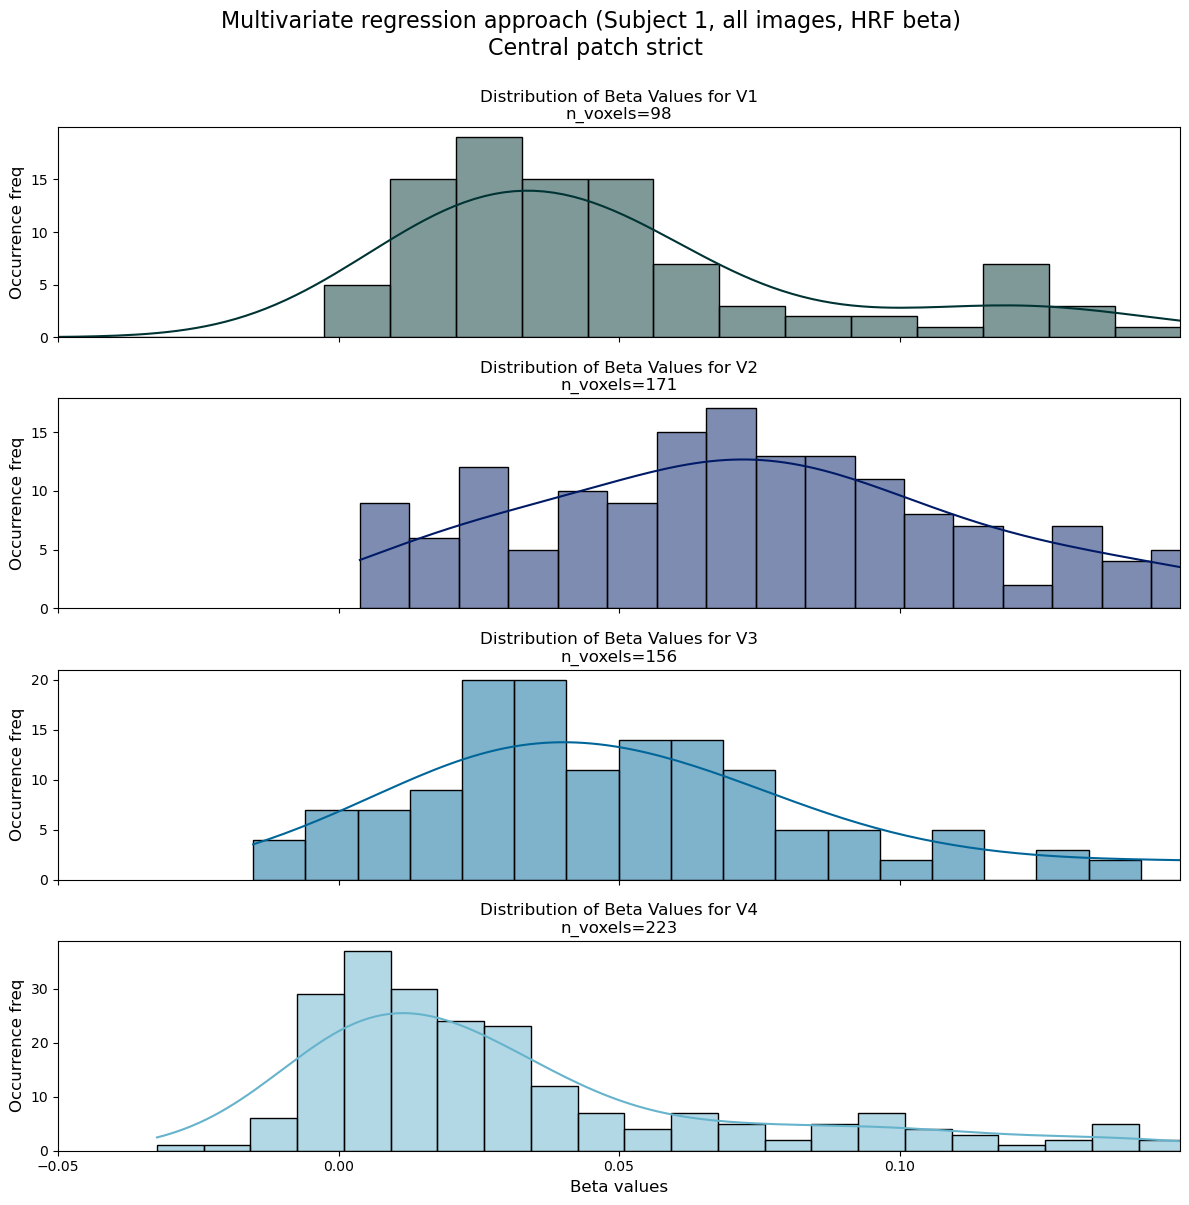

0
1
2
3


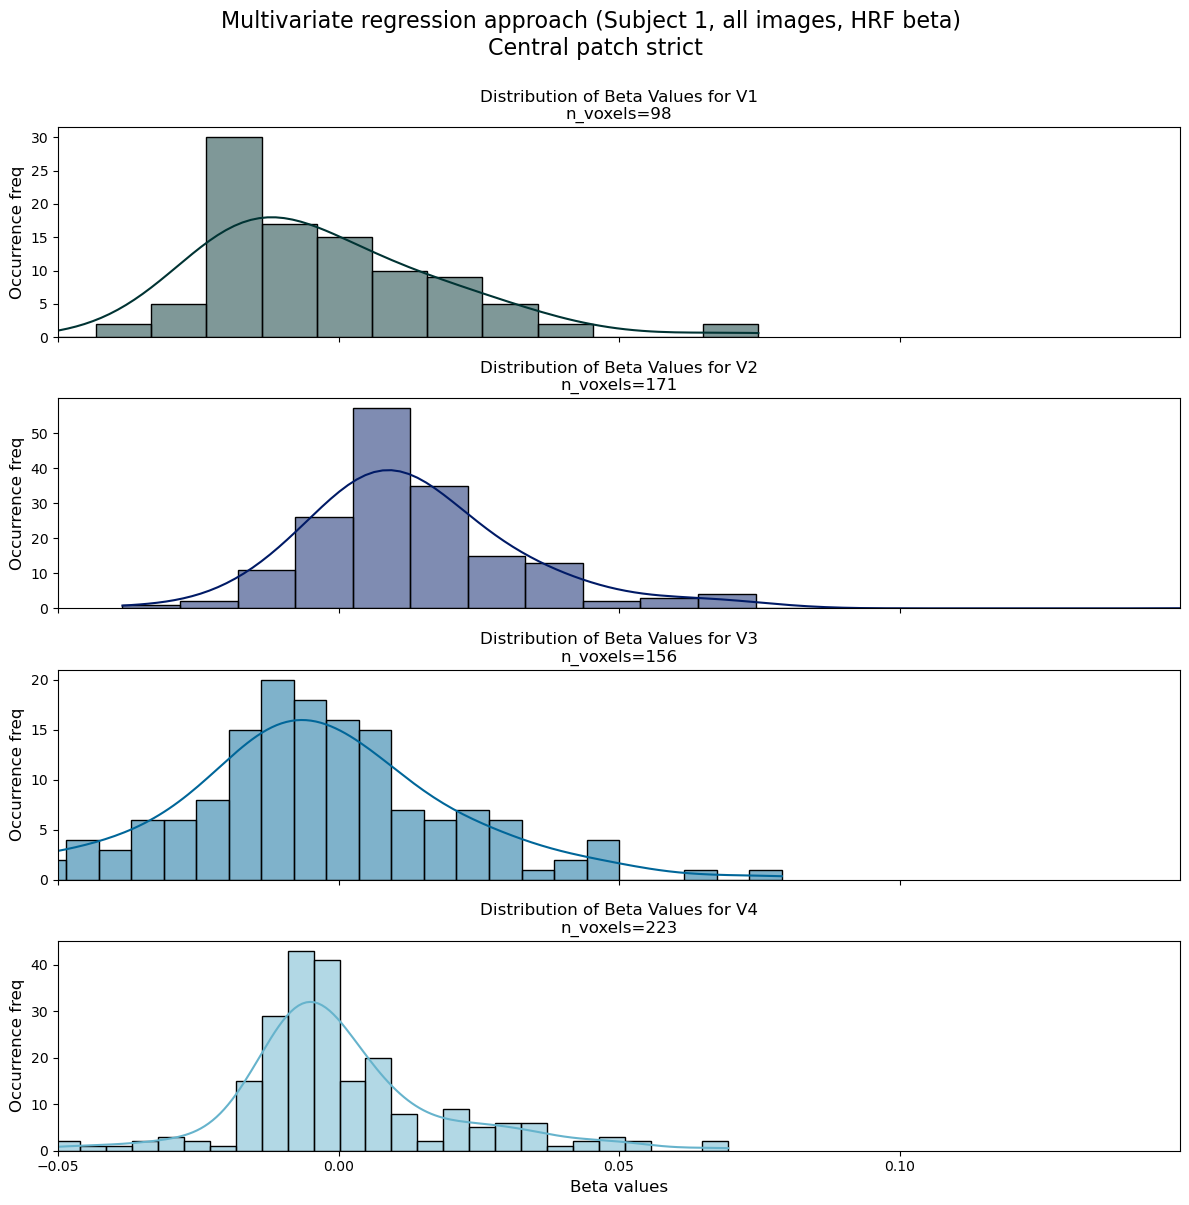

In [215]:

plot_roi_beta_distribution(regdict_prfc_rmsrel, z_score = 'n', icept_correct = 'n', feat_type = '\nCentral patch strict')
plot_roi_beta_distribution(regdict_prfc_rmsirrel, z_score = 'n', icept_correct = 'n', feat_type = '\nCentral patch strict')